In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, BoundaryNorm
import matplotlib.cm as cm

In [7]:
mu0 = 4*np.pi*1e-7
c = 3e8
q = 1
factor = 9e9

def fields_trans(x, y, z, beta: np.ndarray, beta_dot: np.ndarray, q=1, c=3e8, factor=9e9):
    r_vec = np.array([x, y, z])
    r = np.linalg.norm(r_vec)
    n = r_vec / r
    num = np.cross(n, np.cross((n - beta), beta_dot))
    denom = (1 - np.dot(n, beta))**3 * r
    E = (q * factor / c) * num / denom
    return E[0], E[1], E[2]


In [8]:
def power_plot(beta: np.ndarray, beta_dot: np.ndarray):
    grid_size = 200
    grid_range = 10
    x = np.linspace(-grid_range, grid_range, grid_size)
    y = np.linspace(-grid_range, grid_range, grid_size)
    z = np.linspace(-grid_range, grid_range, grid_size)

    S_xy = np.zeros((grid_size, grid_size))
    S_xz = np.zeros((grid_size, grid_size))
    S_yz = np.zeros((grid_size, grid_size))

    # XY plane (z=0)
    z0 = 0
    for i in range(grid_size):
        for j in range(grid_size):
            Ex, Ey, Ez = fields_trans(x[j], y[i], z0, beta, beta_dot)
            S_xy[i,j] = (Ex**2 + Ey**2 + Ez**2)/mu0

    # XZ plane (y=0)
    y0 = 0.0
    for i in range(grid_size):
        for j in range(grid_size):
            Ex, Ey, Ez = fields_trans(x[j], y0, z[i], beta, beta_dot)
            S_xz[i,j] = (Ex**2 + Ey**2 + Ez**2)/mu0

    # YZ plane (x=0)
    x0 = 0.0
    for i in range(grid_size):
        for j in range(grid_size):
            Ex, Ey, Ez = fields_trans(x0, y[j], z[i], beta, beta_dot)
            S_yz[i,j] = (Ex**2 + Ey**2 + Ez**2)/mu0


    levels = np.logspace(np.log10(S_xy.min()), np.log10(S_xy.max()), 9)  # 5 color steps
    cmap = cm.get_cmap('CMRmap', len(levels)-1)  # discrete version of CMRmap
    norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


    fig, axs = plt.subplots(1, 3, figsize=(18,5))

    im1 = axs[0].imshow(S_xy, extent=[-grid_range, grid_range, -grid_range, grid_range],
                        origin='lower',cmap=cmap, norm=LogNorm())
    axs[0].set_title("XY plane (z=0)")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")
    plt.colorbar(im1, ax=axs[0])

    im2 = axs[1].imshow(S_xz, extent=[-grid_range, grid_range, -grid_range, grid_range],
                        origin='lower',cmap=cmap, norm=LogNorm())
    axs[1].set_title("XZ plane (y=0)")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("z")
    plt.colorbar(im2, ax=axs[1])

    im3 = axs[2].imshow(S_yz, extent=[-grid_range, grid_range, -grid_range, grid_range],
                        origin='lower',cmap=cmap, norm=LogNorm())
    axs[2].set_title("YZ plane (x=0)")
    axs[2].set_xlabel("y")
    axs[2].set_ylabel("z")
    plt.colorbar(im3, ax=axs[2])

    plt.suptitle(f"Power plots for beta = {beta[0], beta[1], beta[2]} and beta_dot = {beta_dot[0], beta_dot[1], beta_dot[2]}")
    plt.tight_layout()
    plt.show()


#### Now we plot the different cases

- beta_dot: (0,0,0.3)
    - beta = (0.1,0,0)
    - beta = (0.9,0,0)
    - beta = (0.999,0,0) 

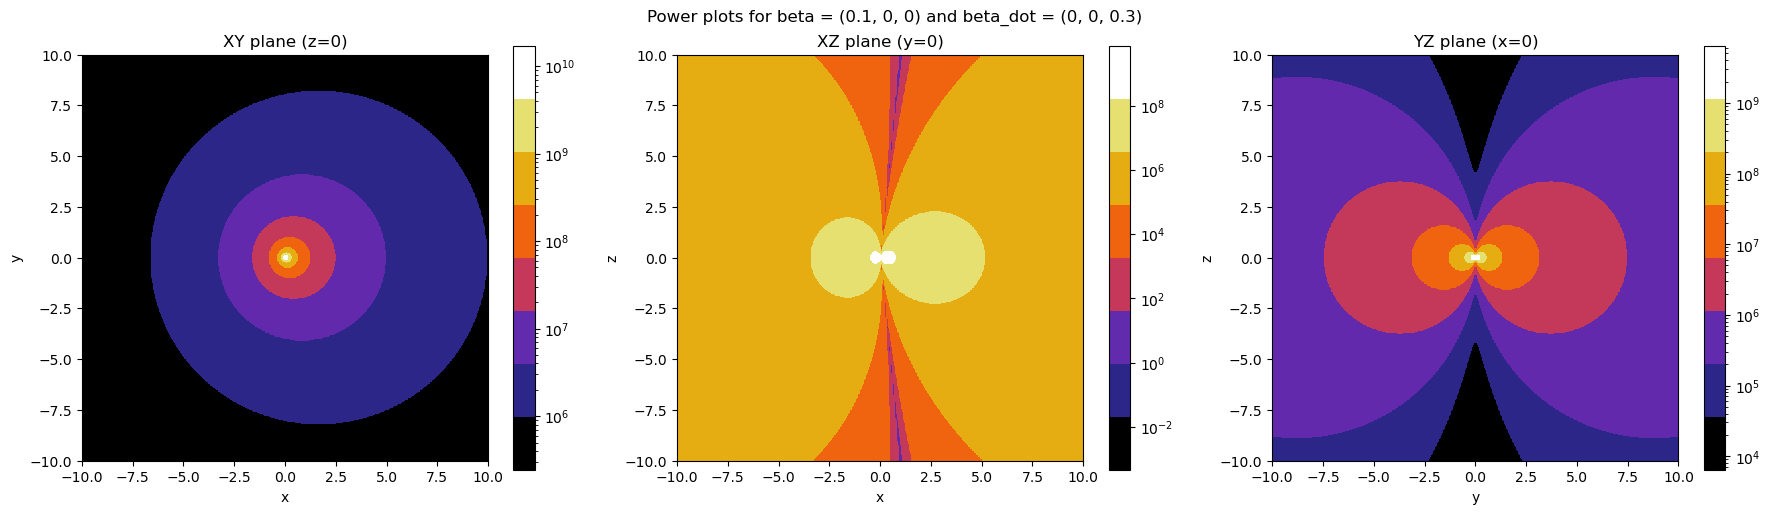

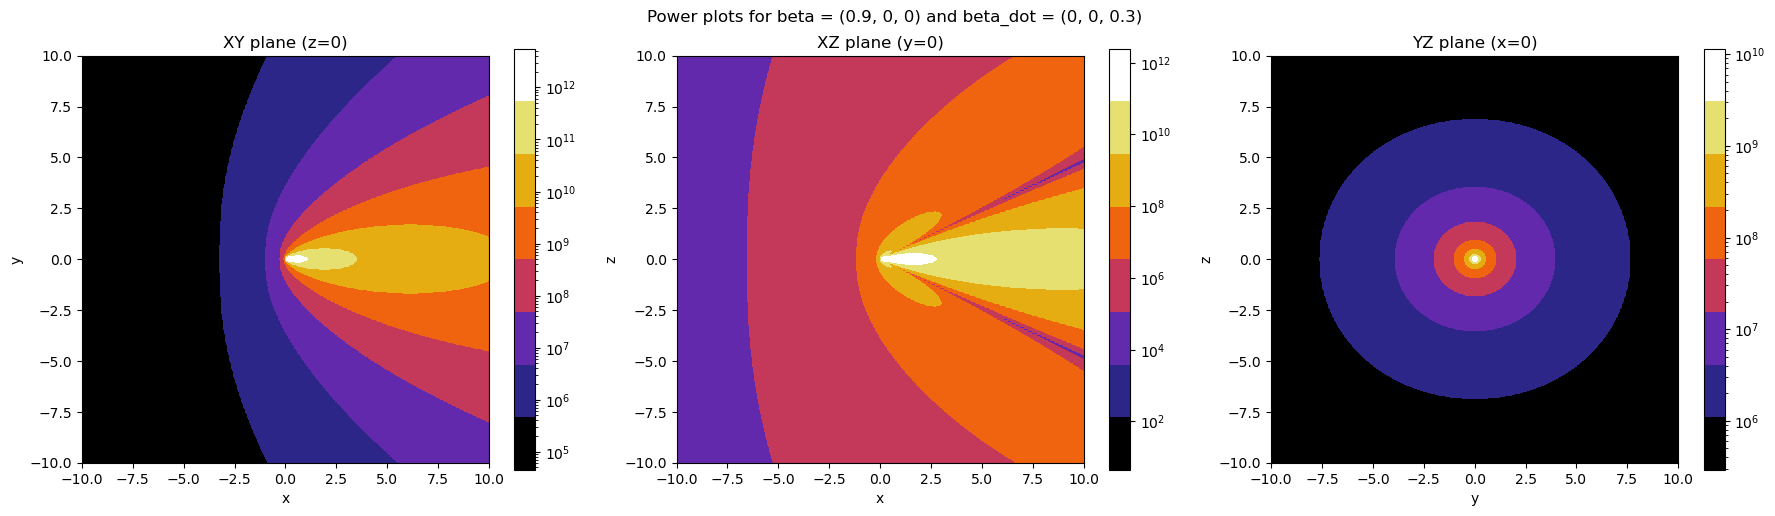

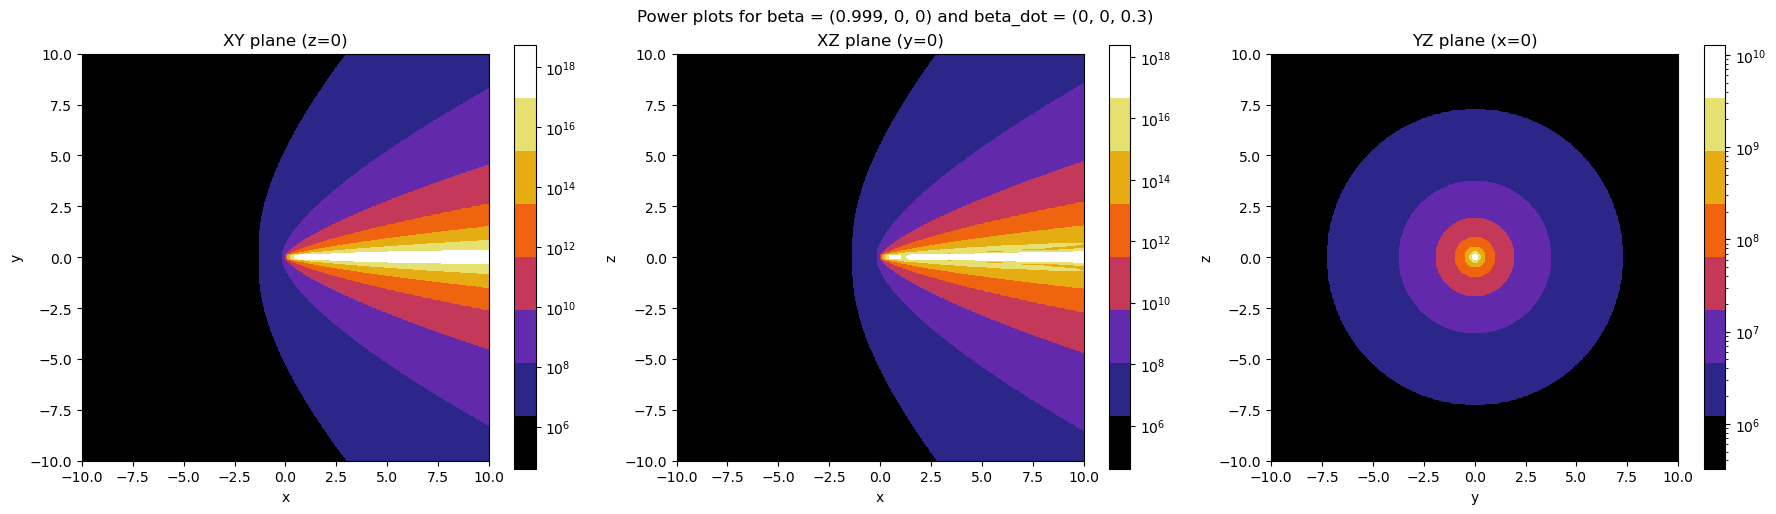

In [9]:
power_plot([0.1,0,0], [0,0,0.3])
power_plot([0.9,0,0], [0,0,0.3])
power_plot([0.999,0,0], [0,0,0.3])


- beta_dot: (0.9,0,0)
    - beta = (0.1,0,0)
    - beta = (0.9,0,0)
    - beta = (0.999,0,0) 

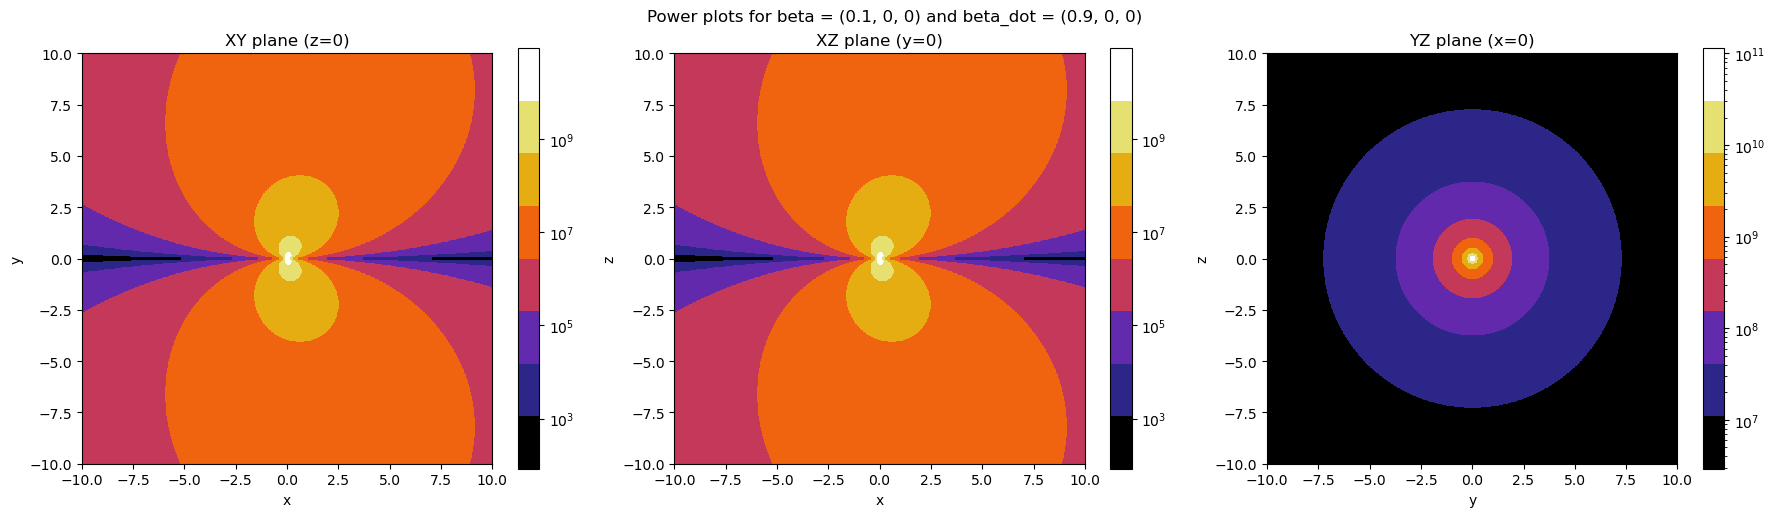

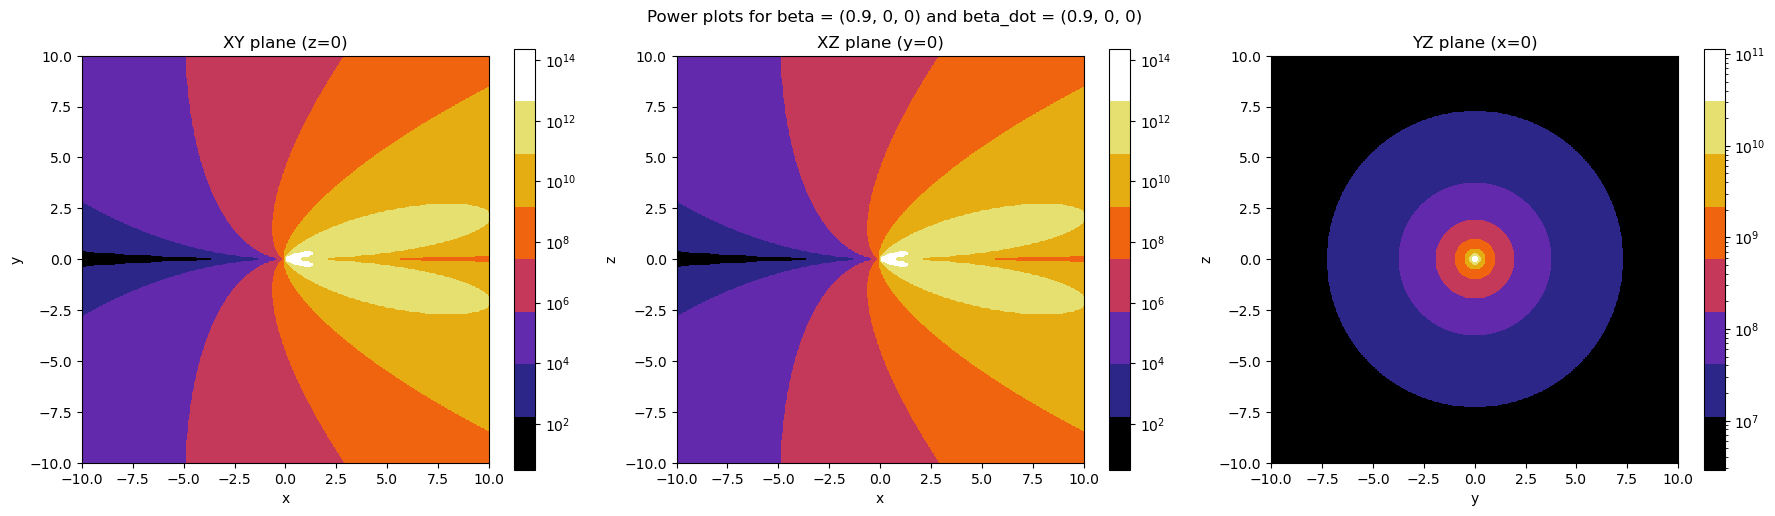

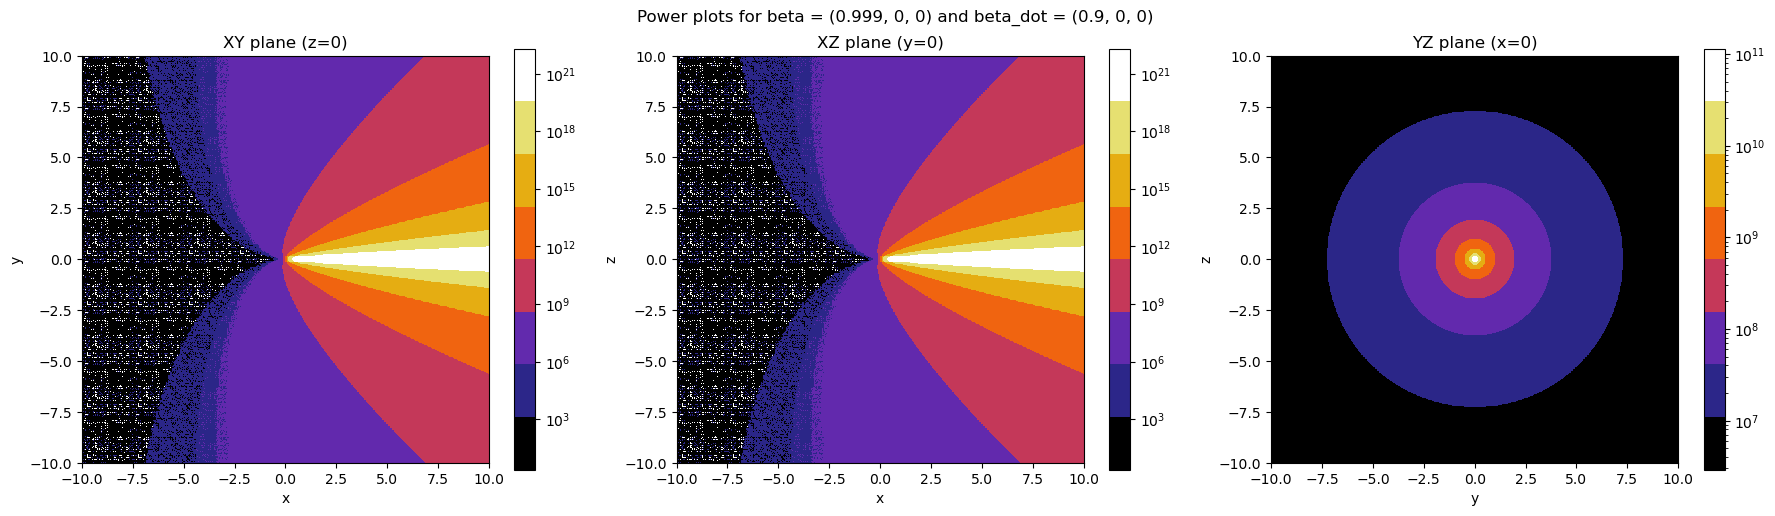

In [10]:
power_plot([0.1,0,0], [0.9,0,0])
power_plot([0.9,0,0], [0.9,0,0])
power_plot([0.999,0,0], [0.9,0,0])
